In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
history=model.fit(train_data,train_target,epochs=100,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 554 samples, validate on 139 samples
Epoch 1/100
554/554 [==============================] - 50s 91ms/step - loss: 0.6992 - acc: 0.5505 - val_loss: 0.7003 - val_acc: 0.4964
Epoch 2/100
554/554 [==============================] - 41s 73ms/step - loss: 0.6652 - acc: 0.5632 - val_loss: 0.6600 - val_acc: 0.4964
Epoch 3/100
554/554 [==============================] - 41s 75ms/step - loss: 0.6461 - acc: 0.5939 - val_loss: 0.6420 - val_acc: 0.5252
Epoch 4/100
554/554 [==============================] - 49s 88ms/step - loss: 0.5854 - acc: 0.6498 - val_loss: 0.5867 - val_acc: 0.6763
Epoch 5/100
554/554 [==============================] - 56s 102ms/step - loss: 0.5740 - acc: 0.6625 - val_loss: 0.5628 - val_acc: 0.7266
Epoch 6/100
554/554 [==============================] - 40s 72ms/step - loss: 0.5166 - acc: 0.7220 - val_loss: 0.5371 - val_acc: 0.7698
Epoch 7/100
554/554 [==============================] - 44s 79ms/step - loss: 0.4492 - acc: 0.78

Epoch 59/100
554/554 [==============================] - 10817s 20s/step - loss: 7.8694e-04 - acc: 1.0000 - val_loss: 1.2653 - val_acc: 0.7770
Epoch 60/100
554/554 [==============================] - 43s 77ms/step - loss: 7.5548e-04 - acc: 1.0000 - val_loss: 1.2725 - val_acc: 0.7842
Epoch 61/100
554/554 [==============================] - 58s 104ms/step - loss: 7.0896e-04 - acc: 1.0000 - val_loss: 1.2790 - val_acc: 0.7914
Epoch 62/100
554/554 [==============================] - 64s 116ms/step - loss: 6.7630e-04 - acc: 1.0000 - val_loss: 1.2897 - val_acc: 0.7770
Epoch 63/100
554/554 [==============================] - 64s 115ms/step - loss: 6.4189e-04 - acc: 1.0000 - val_loss: 1.2872 - val_acc: 0.7914
Epoch 64/100
554/554 [==============================] - 63s 115ms/step - loss: 6.1624e-04 - acc: 1.0000 - val_loss: 1.2975 - val_acc: 0.7842
Epoch 65/100
554/554 [==============================] - 63s 114ms/step - loss: 5.8605e-04 - acc: 1.0000 - val_loss: 1.3056 - val_acc: 0.7770
Epoch 66/100


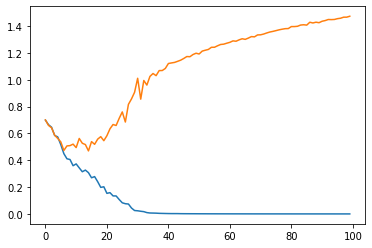

In [5]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

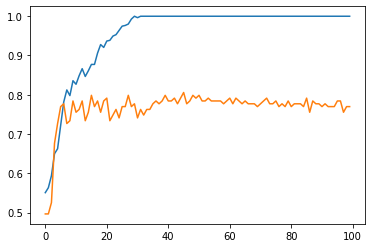

In [6]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [7]:
print(model.evaluate(test_data,test_target))

77/77 [==============================] - 1s 8ms/step
[1.5427564568333811, 0.7792207815430381]


In [8]:
model.save_weights('SANDRIANA LEAF CNN.h5')